### Exercises
 
1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)

2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.

3. Plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). ThenPlot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the resdiuals when controlling for each variable? Why does this matter?

4. Plot the observed and predicted values of RGDP Per Capita for each individual country.

5. Repeat questions 1 through 4 using 2 year lags and differences instead of 5 year lags and differences.

## 1

In [27]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [17]:
hw_data = pd.read_excel("EFWAndRGDP.xls")

In [18]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]
hw_data[hw_data["Countries"].isin(oecd_countries)]

,ISO_Code_3,Year,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
135,AUS,1970-01-01,AU,East Asia & Pacific,NaN,Australia,7.291154,6.863768,7.775615,9.581113,5.882101,6.335298,19166.0000
136,NaN,1975-01-01,AU,East Asia & Pacific,NaN,Australia,7.002204,6.255684,8.034445,8.346907,5.692162,6.761980,20993.0000
137,NaN,1980-01-01,AU,East Asia & Pacific,NaN,Australia,7.316469,6.339449,8.037057,9.085686,5.841104,7.389934,22972.0000
138,NaN,1985-01-01,AU,East Asia & Pacific,NaN,Australia,7.670016,6.259326,8.540345,9.089736,6.985368,7.469774,24927.0000
139,NaN,1990-01-01,AU,East Asia & Pacific,H,Australia,7.927001,6.708215,8.398730,9.018318,7.661409,7.750886,27373.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,NaN,2016-01-01,US,North America,H,United States,8.339536,7.252009,7.793107,9.814703,7.889129,8.952382,53015.0000
4289,NaN,2017-01-01,US,North America,H,United States,8.379486,7.354358,7.802657,9.772320,7.921225,9.031901,54007.7698
4290,NaN,2018-01-01,US,North America,H,United States,8.279612,7.409095,7.646530,9.772494,7.783384,8.784245,55334.7394
4291,NaN,2019-01-01,US,North America,H,United States,8.249649,7.320058,7.644319,9.747903,7.829949,8.682216,NaN


In [19]:
reg_vars = list(data.keys())
reg_vars

['ISO_Code_2',
 'World Bank Region',
 'World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)',
 'Countries',
 'Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'Standard Deviation of the 5 EFW Areas']

In [22]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[5:-1]
y_var,x_vars

(['Standard Deviation of the 5 EFW Areas'],
 ['Size of Government',
  'Legal System and Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation'])

In [23]:
reg_data=data[reg_vars].dropna()

In [24]:
y=reg_data[y_var]
X= reg_data[x_vars]
X["Constant"]=1
results=sm.OLS(y,X).fit()

C:\Users\joeyw\AppData\Local\Temp\ipykernel_21296\3855281368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"]=1


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Standard Deviation of the 5 EFW Areas   R-squared:                       0.311
Model:                                               OLS   Adj. R-squared:                  0.310
Method:                                    Least Squares   F-statistic:                     294.6
Date:                                   Sun, 07 May 2023   Prob (F-statistic):          9.41e-261
Time:                                           19:54:48   Log-Likelihood:                -1174.2
No. Observations:                                   3270   AIC:                             2360.
Df Residuals:                                       3264   BIC:                             2397.
Df Model:                                              5                                         
Covariance Type:                               nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -0.0243      0.006     -4.372      0.000      -0.035      -0.013
Legal System and Property Rights    -0.1694      0.006    -29.245      0.000      -0.181      -0.158
Sound Money                          0.1172      0.005     21.683      0.000       0.107       0.128
Freedom to Trade Internationally     0.0416      0.007      6.233      0.000       0.029       0.055
Regulation                          -0.0426      0.008     -5.325      0.000      -0.058      -0.027
Constant                             1.5208      0.049     31.006      0.000       1.425       1.617
==============================================================================
Omnibus:                      496.376   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1105.401
Skew:                           0.884   Prob(JB):                    9.23e-241
Kurtosis:                       5.234   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
y_var

['Standard Deviation of the 5 EFW Areas']

## 2

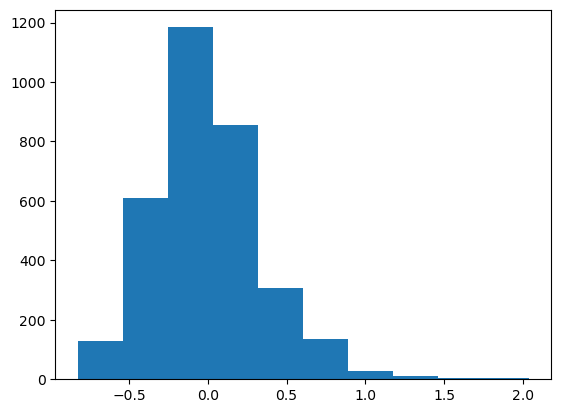

In [48]:
reg_data["Residuals"]=(y.sub(y_hat))
plt.hist(reg_data["Residuals"])
plt.show()

the reason that this looks different then the one in the class is that it is less countries therfore less varibles.

## 3

In [60]:
reg_data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,Standard Deviation of the 5 EFW Areas Predictor,Residuals
ISO_Code_3,Year,,,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742,1.626536,0.026206
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103,1.513482,0.099621
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854,1.367720,0.231134
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924,0.974890,0.280034
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292,1.380371,-0.202079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,1990,US,North America,H,United States,8.461126,7.262163,8.350956,9.669842,8.537828,8.477998,0.853932,1.057627,-0.203695
URY,1990,UY,Latin America & the Caribbean,UM,Uruguay,6.262442,7.026737,5.856224,3.762722,7.503044,7.137626,1.525014,0.807657,0.717357
VEN,1990,VE,Latin America & the Caribbean,UM,"Venezuela, RB",5.583700,7.128136,4.902547,4.060094,6.754464,5.024922,1.308920,1.060401,0.248518


<AxesSubplot:xlabel='Standard Deviation of the 5 EFW Areas', ylabel='Standard Deviation of the 5 EFW Areas Predictor'>

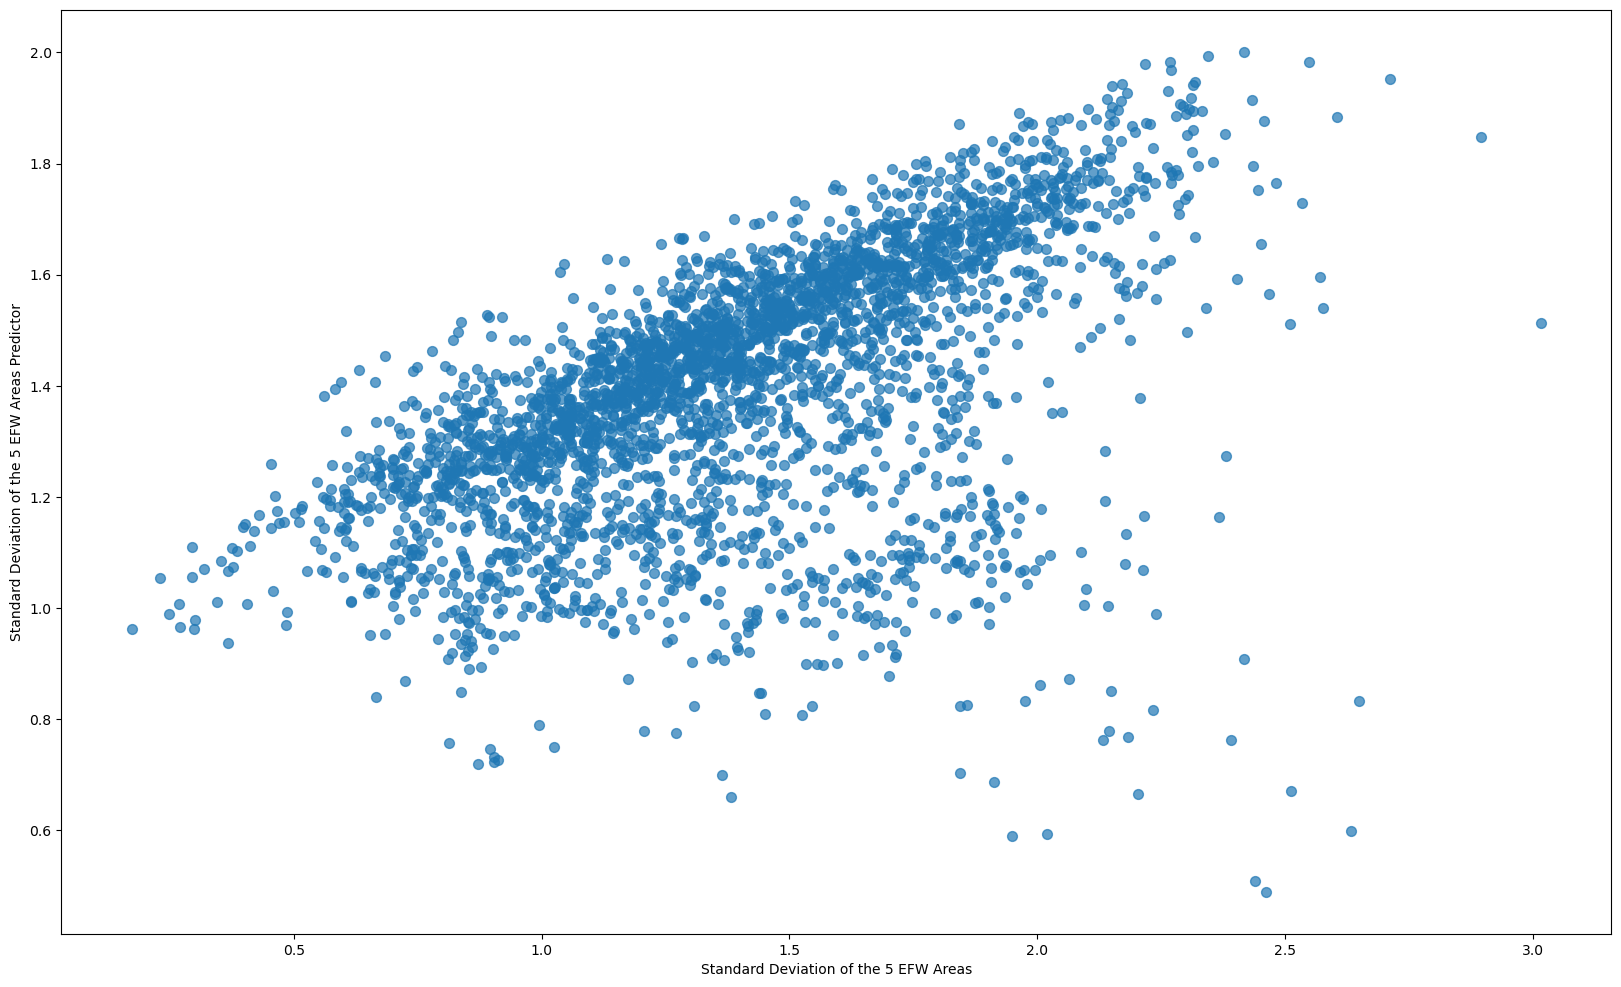

In [68]:
fig, ax = plt.subplots(figsize = (20,12))
reg_data.plot.scatter(x = y_var[-1],
                 y = "Standard Deviation of the 5 EFW Areas Predictor", 
                  s = 50,
                  alpha=.7,
                  ax = ax)

we see the bias in the resdiuals is towards the smaller real gdp. this matters because it show s that the perdictor is not always correct.

## 4

In [ ]:
data.plot.line()